In [1]:
import utils, data, simulation
import os
import os.path as op
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
checkAxon = True
drawAllDist = False

In [3]:
#where the data is
datapath = os.environ['VISCOG_DATA']
#folder containing scripts
scriptpath = os.environ['SCRIPT_DATA']
outpath = op.join(scriptpath, 'data')
filename = 'S_12-005_12-104_13-101__collated_both_sessions.csv'


processing = data.processing()
(double_x2, catch, subjectdata) = processing.get_two_point(outpath, scriptpath, filename)

In [4]:
#simulations = simulation.get_sims(subjectdata)
subjects = subjectdata.index

In [5]:
subjectdata

,implant_rot,implant_type,implant_type_str,implant_x,implant_y,loc_od_x,loc_od_y,viscog_subject_id,xmax,xmin,ymax,ymin,eye,session,rho,lambda,scale
subject_id,,,,,,,,,,,,,,,,,
12-005,-0.49500,<class 'pulse2percept.implants.ArgusII'>,ArgusII,-1331.0000,-850.0000,16.200000,1.380000,NaN,30.0,-30.0,22.5,-22.5,RE,2019_05_29,315.00,500.0,0.5
12-104,-0.35500,<class 'pulse2percept.implants.ArgusII'>,ArgusII,-515.0000,108.0000,18.500000,2.620000,NaN,30.0,-30.0,22.5,-22.5,RE,2019_05_30,1887.69,10.0,0.5
13-101,-0.67358,<class 'pulse2percept.implants.ArgusII'>,ArgusII,-965.1227,429.0195,15.055678,1.821214,NaN,30.0,-30.0,22.5,-22.5,RE,2019_05_31,1127.00,717.0,0.5


## Checking for cases where people report more than 2

In [6]:
# we initially process reported number of shapes to account for strings and floats
double_x2['no_of_3s'] = double_x2.apply(processing.process_ptsnumber_in_double, change23=False, axis =1)

No number is added for file /mnt/viscog/FineLab/Data/12-005/2019_10_09/drawings_filled/drawings_double/30_12-005_A02F02_2019-11-19_13-17-57.png
, 
 could you fix this problem by looking at description 
 2 shapes. the shapes were not solid- pixellated. shapes are about the same size?2


You are adding the integer  2


2
There is a string instead of a number,
Please fix lower right one was weaker than the top left one
Description is: 22


You are adding the integer  2


2
No number is added for file /mnt/viscog/FineLab/Data/12-005/2019_10_09/drawings_filled/drawings_double/48_12-005_E10F07_2019-11-19_13-31-06.png
, 
 could you fix this problem by looking at description 
 1 flash. cannot see the edges?1


You are adding the integer  1


1
There is a string instead of a number,
Please fix bottom one is slightly to the left and double the size
Description is: nan2


You are adding the integer  2


2
No number is added for file /mnt/viscog/FineLab/Data/12-005/2019_10_09/drawings_filled/drawings_double/107_12-005_A04B06_2019-11-19_14-12-46.png
, 
 could you fix this problem by looking at description 
 1 big flash?1


You are adding the integer  1


1
No number is added for file /mnt/viscog/FineLab/Data/12-104/2019_10_08/drawings_filled/drawings_double/05_12-104_F07B05_2019-10-31_17-23-35.png
, 
 could you fix this problem by looking at description 
 bowl in the bottom middle- not as certain?1


You are adding the integer  1


1


Text(0.5, 0, 'Reported Number of Percepts')

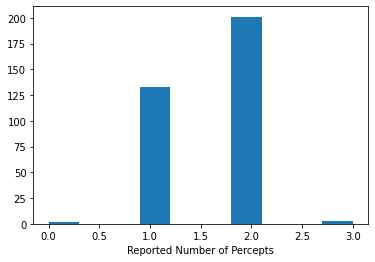

In [7]:
plt.hist(double_x2['no_of_3s'])
plt.xlabel('Reported Number of Percepts')

In [8]:
double_x2.groupby('subject_id')['no_of_3s'].value_counts()

subject_id  no_of_3s
12-005      2           114
            1            66
12-104      1            29
            2            20
            3             3
            0             2
13-101      2            67
            1            38
Name: no_of_3s, dtype: int64

In [9]:
proportion = double_x2['no_of_3s'].value_counts()/len(double_x2)
proportion

2    0.59292
1    0.39233
3    0.00885
0    0.00590
Name: no_of_3s, dtype: float64

In [10]:
proportion[3]+proportion[0]

0.014749262536873156